In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# TRAIN DATA

In [ ]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
train_data.head()

,ID,Sentence
0,0,"sınıf , havuz ve açık deniz çalışmalarıyla , t..."
1,1,"bu standart , sualtında kendini rahat hisseden..."
2,2,"yapılan araştırmalar , öğrencilerin mevcut dal..."
3,3,"pdıc öğrencilerinde , psikolojik eğitim ve yet..."
4,4,"pdıc eğitiminin sağladığı güven ve rahatlık , ..."


In [ ]:
train_data.shape

(52362, 2)

There are 52362 sentences in train set

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52362 entries, 0 to 52361
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        52362 non-null  int64 
 1   Sentence  52362 non-null  object
dtypes: int64(1), object(1)
memory usage: 818.3+ KB


## Word Counts

Maximum Word Count: 3997
Minimum Word Count: 1
Average Word Count: 13.931305144952447
Total Number of Words: 729471


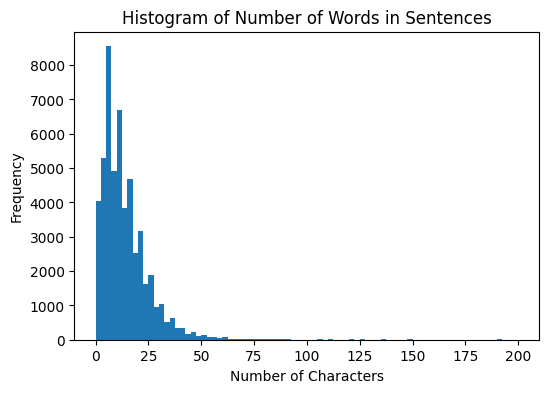

In [ ]:
import pandas as pd

# Calculate word lengths for each sentence
train_data['Word_Count'] = train_data['Sentence'].apply(lambda x: len(x.split()))

# Calculate the maximum, minimum, and average word count
max_word_count = train_data['Word_Count'].max()
min_word_count = train_data['Word_Count'].min()
avg_word_count = train_data['Word_Count'].mean()

# Calculate the total number of words in the dataset
total_words = train_data['Word_Count'].sum()

# Display statistics
print("Maximum Word Count:", max_word_count)
print("Minimum Word Count:", min_word_count)
print("Average Word Count:", avg_word_count)
print("Total Number of Words:", total_words)

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))  # Adjust width and height as needed

# Plotting the histogram with adjusted x-axis range
plt.hist(train_data['Word_Count'], bins=80, range=(0, 200))  # Adjust the number of bins as needed
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Sentences')

plt.show()

In [ ]:
# Longest sentence
longest_sentence_index = train_data['Word_Count'].idxmax()
longest_sentence = train_data.loc[longest_sentence_index, 'Sentence']

print("En uzun cümle:", longest_sentence)

En uzun cümle:  son öpücük ( italyan yapımı ) ve <q> konuş onunla </q> . 
bu kadar hayatın içinden filmler yapmayı avrupa sineması çok daha iyi beceriyor bence . 
insanlığın tamamen bitmediğini görmek ve buna inanmak gerçekten çok hoş . 
yani daha seyretmedim 
bu film bence en iyi 100 film arasına girebilir . 
yönetmenimiz insan ilişkilerini öylesine derin ve hassas irdeleyip bunları müzik ve görüntü ile derlemişki .işte sinema budur diyebiliriz . 
bana göre filmin geçmiş ve gelecek arasında bir köprü sunması , güzel ve çirkin aşklarına nazire yapması vb . 
gibi bir çok konuyu en önemlisi tutku , aşk ve sevginin nasıl bir arada olduğunu anlatması olağanüstü . 
ben filmi seyrettikten sonra uzun uzun 
hayata ve insana dair doğal ögeleri o kadar güzel süslemiş ki her izleyeni biranda kendi içine alıyor film . 
basit insanların basit hayatların içinde de olağanüstü aşklara güzel örnekler . 
psikanalize giriş dersleri . 
freud'un rüyaların analizi'ni tekrar okumuş gibi oldum , filmdeki semb

In [ ]:
# Top 10 longest sentence and their word counts
sorted_data = train_data.sort_values(by='Word_Count', ascending=False)

top_10_longest_sentences = sorted_data.head(10)
print(top_10_longest_sentences)

          ID                                           Sentence  Word_Count
15480  15480   son öpücük ( italyan yapımı ) ve <q> konuş on...        3997
8563    8563  ) ; azerbaycan âşıkları ve halk şairleri ıı , ...         324
11005  11005  öncelikle bu tür bir aktivite yaptığı için myn...         223
11573  11573  öncelikle bu tür bir aktivite yaptığı için myn...         223
30532  30532   qkızları ve nez light taş fırın erkekleri kur...         216
10968  10968  eski okul arkadaşım ve aşık oldugum bir kız va...         201
11536  11536  eski okul arkadaşım ve aşık oldugum bir kız va...         201
10252  10252  denize açıl - , içine akıt - , avuç içine al -...         192
10238  10238  denize açıl - , içine akıt - , avuç içine al -...         192
10211  10211  denize açıl - , içine akıt - , avuç içine al -...         192


### Outliers

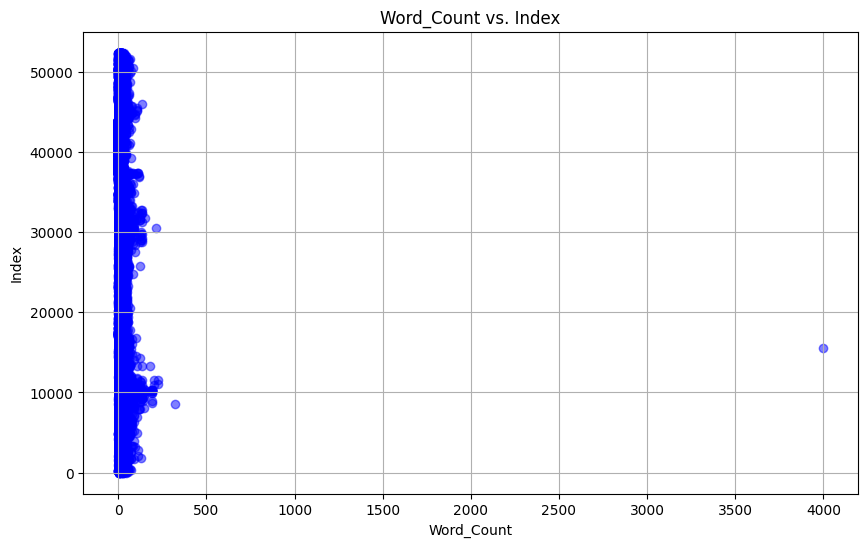

In [ ]:
import matplotlib.pyplot as plt

sorted_data = train_data.sort_values(by='Word_Count')

plt.figure(figsize=(10, 6))
plt.scatter(sorted_data['Word_Count'], sorted_data.index, color='blue', alpha=0.5)
plt.title('Word_Count vs. Index')
plt.xlabel('Word_Count')
plt.ylabel('Index')
plt.grid(True)
plt.show()

One outlier has been identified, and it can be considered to be simply removed or to be divided into sentences. The sentences in this row will be tokenized in order to obtain more data.

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')  # Download the necessary resources for tokenization

# Your long sentence with ID 15480
long_sentence = train_data.loc[train_data['ID'] == 15480, 'Sentence'].values[0]

# Sentence tokenization
tokenized_sentences = nltk.sent_tokenize(long_sentence)

# Create a DataFrame for tokenized sentences
tokenized_df = pd.DataFrame({'ID': [train_data['ID'].max() + idx + 1 for idx in range(len(tokenized_sentences))],
                             'Sentence': tokenized_sentences})

# Concatenate tokenized_df with train_data
train_data = pd.concat([train_data, tokenized_df], ignore_index=True)

# Train veri setinden 15480 ID'ye sahip satırı kaldırma
train_data = train_data.drop(train_data[train_data['ID'] == 15480].index)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokenized_sentences

[' son öpücük ( italyan yapımı ) ve <q> konuş onunla </q> .',
 'bu kadar hayatın içinden filmler yapmayı avrupa sineması çok daha iyi beceriyor bence .',
 'insanlığın tamamen bitmediğini görmek ve buna inanmak gerçekten çok hoş .',
 'yani daha seyretmedim \r\nbu film bence en iyi 100 film arasına girebilir .',
 'yönetmenimiz insan ilişkilerini öylesine derin ve hassas irdeleyip bunları müzik ve görüntü ile derlemişki .işte sinema budur diyebiliriz .',
 'bana göre filmin geçmiş ve gelecek arasında bir köprü sunması , güzel ve çirkin aşklarına nazire yapması vb .',
 'gibi bir çok konuyu en önemlisi tutku , aşk ve sevginin nasıl bir arada olduğunu anlatması olağanüstü .',
 'ben filmi seyrettikten sonra uzun uzun \r\nhayata ve insana dair doğal ögeleri o kadar güzel süslemiş ki her izleyeni biranda kendi içine alıyor film .',
 'basit insanların basit hayatların içinde de olağanüstü aşklara güzel örnekler .',
 'psikanalize giriş dersleri .',
 "freud'un rüyaların analizi'ni tekrar okumuş gib

## After processing outliers

Maximum Word Count: 324
Minimum Word Count: 1
Average Word Count: 13.885183493223694
Total Number of Words: 729472


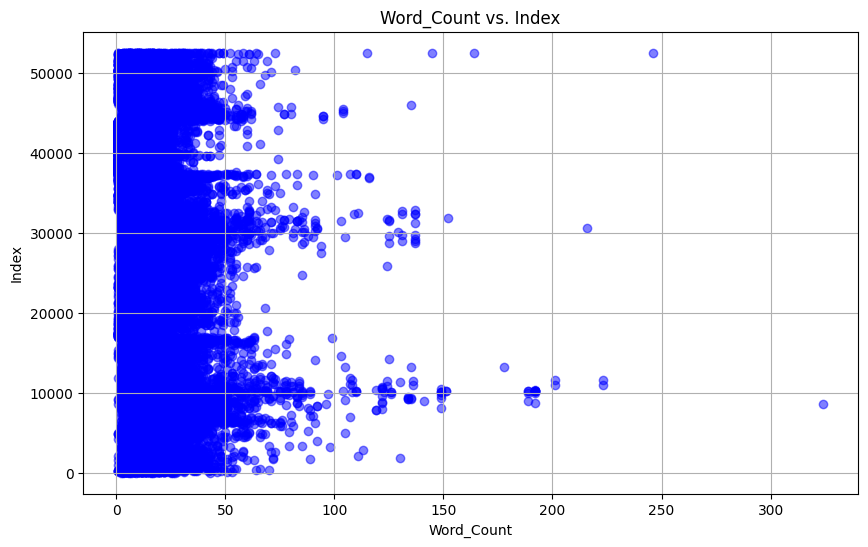

In [ ]:
import pandas as pd

# Calculate word lengths for each sentence
train_data['Word_Count'] = train_data['Sentence'].apply(lambda x: len(x.split()))

# Calculate the maximum, minimum, and average word count
max_word_count = train_data['Word_Count'].max()
min_word_count = train_data['Word_Count'].min()
avg_word_count = train_data['Word_Count'].mean()

# Calculate the total number of words in the dataset
total_words = train_data['Word_Count'].sum()

# Display statistics
print("Maximum Word Count:", max_word_count)
print("Minimum Word Count:", min_word_count)
print("Average Word Count:", avg_word_count)
print("Total Number of Words:", total_words)

import matplotlib.pyplot as plt

sorted_data = train_data.sort_values(by='Word_Count')

plt.figure(figsize=(10, 6))
plt.scatter(sorted_data['Word_Count'], sorted_data.index, color='blue', alpha=0.5)
plt.title('Word_Count vs. Index')
plt.xlabel('Word_Count')
plt.ylabel('Index')
plt.grid(True)
plt.show()

In [ ]:
# Save the final dataset to a CSV file
train_data[['ID', 'Sentence']].to_csv('final_train.csv', index=False)

## Number of Chars

In [ ]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# Calculate the number of characters in each sentence
train_data['Num_chars'] = train_data['Sentence'].apply(len)

# Find the maximum and minimum number of characters
max_chars = train_data['Num_chars'].max()
min_chars = train_data['Num_chars'].min()

print("Maximum number of characters:", max_chars)
print("Minimum number of characters:", min_chars)


Maximum number of characters: 27303
Minimum number of characters: 1


In [ ]:
# Sort the DataFrame by the "Num_chars" column
sorted_data = train_data.sort_values(by='Num_chars', ascending=False)

# Display the first 10 sentences according to the number of characters
sorted_data.head(10)

,ID,Sentence,Num_chars
15480,15480,son öpücük ( italyan yapımı ) ve <q> konuş on...,27303
37582,37582,ülkeniz:seçiniztürkiyeabdafganistanalmanyaand...,1735
8563,8563,") ; azerbaycan âşıkları ve halk şairleri ıı , ...",1676
11573,11573,öncelikle bu tür bir aktivite yaptığı için myn...,1511
11005,11005,öncelikle bu tür bir aktivite yaptığı için myn...,1511
11536,11536,eski okul arkadaşım ve aşık oldugum bir kız va...,1440
10968,10968,eski okul arkadaşım ve aşık oldugum bir kız va...,1440
13253,13253,nekadar eyitimsiz oldugunu deyilde o eyitimler...,1365
30532,30532,qkızları ve nez light taş fırın erkekleri kur...,1361
31790,31790,ikinci şarkı nil nehrinin taştığı yıldı sabır...,1074


# TEST DATA

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
test_data.head()

,ID,Sentence
0,0,tr ekonomi ve politika haberleri turkiye nin ...
1,1,uye girisi
2,2,son guncelleme 12:12
3,3,Imrali Mit gorusmesi ihtiyac duyuldukca oluyor
4,4,Suriye deki silahli selefi muhalifler yeni ku...


## Word Counts

Maximum Word Count: 149
Minimum Word Count: 2
Average Word Count: 14.686257562662057
Total Number of Words: 16992


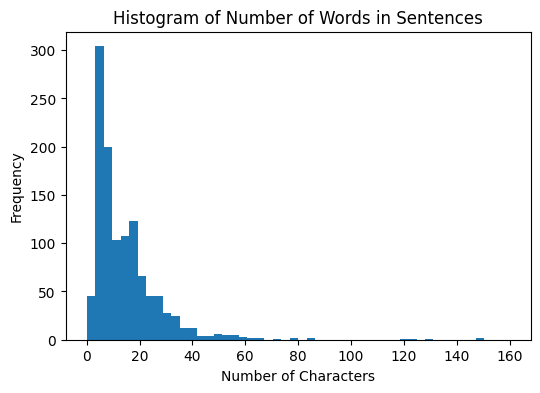

In [ ]:
import pandas as pd

# Calculate word lengths for each sentence
test_data['Word_Count'] = test_data['Sentence'].apply(lambda x: len(x.split()))

# Calculate the maximum, minimum, and average word count
max_word_count = test_data['Word_Count'].max()
min_word_count = test_data['Word_Count'].min()
avg_word_count = test_data['Word_Count'].mean()

# Calculate the total number of words in the dataset
total_words = test_data['Word_Count'].sum()

# Display statistics
print("Maximum Word Count:", max_word_count)
print("Minimum Word Count:", min_word_count)
print("Average Word Count:", avg_word_count)
print("Total Number of Words:", total_words)

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))  # Adjust width and height as needed

# Plotting the histogram with adjusted x-axis range
plt.hist(test_data['Word_Count'], bins=50, range=(0, 160))  # Adjust the number of bins as needed
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Sentences')

plt.show()

In [ ]:
# Longest sentence in test data
longest_sentence_index = test_data['Word_Count'].idxmax()
longest_sentence = test_data.loc[longest_sentence_index, 'Sentence']

print(" En uzun cümle: \n", longest_sentence)

 En uzun cümle: 
 bu ozelliklerin yanisira , yine en ust versiyonunda ; otomatik yol kontrol fonksiyonu ( cruise control ) , 4 hava yastigi , isitmali , elektronik ayarli , 3 ayri hafizali surucu koltugu ve hafizali dis aynalar , cok fonksiyonlu maksi - dot genis ekran gostergeli yol bilgisayari , abs ve edl gibi aktif guvenlik sistemlerine olarak , asr , msr , esp gibi guvenlik ozellikleri , park sensoru , direksiyondan kumandali symphony model radyo , cd changer , aydinlatmali sogutuculu , kilitlenebilir ve 2 adet bardaklik iceren torpido gozu , klimatronik otomatik isi ayarli klima , kapi bolgesini aydinlatan kapi lambalari , far yikama unitesi , arka orta kol dayanaginda portatif kayak muhafaza unitesi , uzaktan kumandali ve anahtardan kontrollu katlanabilir merkezi kilitleme sistemi , isiticili cam silecek suyu , arka cam gunesligi , hali paspas gibi kullanicinin guvenlik ve ust duzeyde konforunu saglayan onemli ekipman ozellikleri bulunmaktadir . 


In [ ]:
# Top 10 longest sentence and their word counts in test data
sorted_data = test_data.sort_values(by='Word_Count', ascending=False)

top_10_longest_sentences = sorted_data.head(10)
print(top_10_longest_sentences)

      ID                                           Sentence  Word_Count
838  838  bu ozelliklerin yanisira , yine en ust versiyo...         149
861  861  denize acil - icine akit - avuc icine al - dil...         148
825  825  cocuklarimiz ......bizlerin gelecegi........bu...         130
716  716  alelacele toplanip masalarin basina hizla yeme...         122
167  167   gosterimdeki filmler alacakaranlik efsanesi: ...         120
824  824  suc bizde isinin ehli insanlari getiremiyoruz ...          85
714  714   bu her an yuvarlanip yitme duygusunu recaizad...          84
734  734   ilk kanli kipirtilarin belirdigi Makedonya da...          77
460  460   kendini Roma Imparatoru olarak da tanitan Fat...          77
673  673   isci ve isveren kesiminin benimsemesi hukumet...          71
